In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn.preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
import statsmodels.api as sm

In [4]:
df1=pd.read_csv('Life Expectancy Data.csv',sep=',',na_values=['#NAME?'])
df1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df1[df1.duplicated()].sum()

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

In [7]:
#df_country=df['Country']
values=df1['Country']
label_encoder=LabelEncoder()
integer_encoded_1=label_encoder.fit_transform(values)
print(integer_encoded)
onehot_encoder=OneHotEncoder()
integer_encoded_2=onehot_encoder.fit_transform(values)
print(integer_encoded)

NameError: name 'integer_encoded' is not defined

In [8]:
df1.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
df1=df1.dropna()
df1.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [10]:
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [11]:
print("Outliers for Infant death")
Infant_death_indices,Infant_death_values = find_outliers_tukey(df1['infant deaths'])
print(np.sort(Infant_death_values))
print("Outliers for Alcohol")
Alcohol_indices, Alcohol_values = find_outliers_tukey(df1['Alcohol'])
print(np.sort(Alcohol_values))
print("Outliers for Percentage Expenditure")
Percentage_Expenditure_indices, Percentage_Expenditure_values = find_outliers_tukey(df1['percentage expenditure'])
print(np.sort(Percentage_Expenditure_values))
print("Outliers for Hepatitis B")
Hepatitis_B_indices, Hepatitis_B_values = find_outliers_tukey(df1['Hepatitis B'])
print(np.sort(Hepatitis_B_values))
print("Outliers for Measles")
Measles_indices, Measles_values = find_outliers_tukey(df1["Measles "])
print(np.sort(Measles_values))
print("Outliers for BMI")
BMI_indices, BMI_values = find_outliers_tukey(df1[' BMI '])
print(np.sort(BMI_values))
print("Outliers for Under Five Death")
Under_Five_Death_indices, Under_Five_Death_values = find_outliers_tukey(df1['under-five deaths '])
print(np.sort(Under_Five_Death_values))
print("Outliers for Polio")
Polio_indices, Polio_values = find_outliers_tukey(df1['Polio'])
print(np.sort(Polio_values))
print("Outliers for Total Expenditure")
Total_Expenditure_indices, Total_Expenditure_values = find_outliers_tukey(df1['Total expenditure'])
print(np.sort(Total_Expenditure_values))
print("Outliers for Diphtheria")
Diphtheria_indices, Diphtheria_values = find_outliers_tukey(df1['Diphtheria '])
print(np.sort(Diphtheria_values))
print("Outliers for Hiv_Aids")
Hiv_Aids_indices, Hiv_Aids_values = find_outliers_tukey(df1[' HIV/AIDS'])
print(np.sort(Hiv_Aids_values))
print("Outliers for GDP")
GDP_indices, GDP_values = find_outliers_tukey(df1['GDP'])
print(np.sort(GDP_values))
print("Outliers for Population")
Population_indices, Population_values = find_outliers_tukey(df1['Population'])
print(np.sort(Population_values))
print("Outliers for Thin_1_19_Years")
Thin_1_19_Years_indices, Thin_1_19_Years_values = find_outliers_tukey(df1[' thinness  1-19 years'])
print(np.sort(Thin_1_19_Years_values))
print("Outliers for Thin_5_9_Year")
Thin_5_9_Year_indices, Thin_5_9_Year_values = find_outliers_tukey(df1[' thinness 5-9 years'])
print(np.sort(Thin_5_9_Year_values))
print("Outliers for Income Comp Resource")
Income_Comp_Resource_indices, Income_Comp_Resource_values = find_outliers_tukey(df1['Income composition of resources'])
print(np.sort(Income_Comp_Resource_values))
print("Outliers for Schooling")
Schooling_indices, Schooling_values = find_outliers_tukey(df1['Schooling'])
print(np.sort(Schooling_values))

Outliers for Infant death
[  54   54   54   54   54   54   54   55   55   55   55   55   55   55
   56   56   56   56   57   57   57   57   57   58   58   58   58   58
   58   59   59   59   59   60   60   61   61   61   61   62   62   62
   62   63   64   64   64   64   65   65   66   66   66   66   66   67
   67   68   68   68   68   69   69   69   69   69   70   70   70   71
   71   72   72   72   73   74   74   74   75   75   76   76   77   78
   78   79   80   80   81   81   82   82   82   84   84   84   85   85
   87   87   87   87   88   88   88   88   88   90   93   95   98   99
  103  104  104  109  111  111  112  118  119  124  126  129  134  135
  138  140  143  144  145  149  150  154  154  156  159  162  163  164
  169  171  173  174  174  177  177  182  185  185  186  187  196  201
  215  231  248  266  285  307  332  359  360  364  364  365  365  366
  367  369  369  371  371  372  391  422  457  490  490  498  505  513
  521  527  536  542  549  556  957 1000 1100 1100 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Outliers for Schooling
[ 4.2  4.4  4.5  4.5  4.7  4.7 19.8 20.1 20.1 20.3 20.3 20.3 20.4 20.5
 20.6 20.7]


In [12]:
#df1.columns
#df_del = df1.drop(bp_indices)
df1["infant deaths"] = np.where(df1["infant deaths"] >3, 3,df1['infant deaths'])
df1["percentage expenditure"] = np.where(df1["percentage expenditure"] >100,64.8845366125,df1['percentage expenditure'])
df1["Measles "] = np.where(df1["Measles "] >50,17,df1['Measles '])
df1["under-five deaths "] = np.where(df1["under-five deaths "] >4,4,df1['under-five deaths '])
df1["GDP"] = np.where(df1["GDP"] >2500,1766.947595,df1['GDP'])
df1.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,1.928441,4.533196,51.878248,79.217708,10.628866,38.128623,2.529412,83.564585,5.955925,84.155246,1.983869,1187.666606,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,1.276077,4.029189,23.510089,25.604664,10.574656,19.754249,1.689636,22.450557,2.299385,21.579193,6.032360,696.665625,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,64.884537,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,3.000000,7.340000,64.884537,96.000000,17.000000,55.800000,4.000000,97.000000,7.470000,97.000000,0.700000,1766.947595,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,3.000000,17.870000,99.080954,99.000000,50.000000,77.100000,4.000000,99.000000,14.390000,99.000000,50.600000,2494.353552,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [13]:
print("Outliers for Infant death")
Infant_death_indices,Infant_death_values = find_outliers_tukey(df1['infant deaths'])
print(np.sort(Infant_death_values))
print("Outliers for Alcohol")
Alcohol_indices, Alcohol_values = find_outliers_tukey(df1['Alcohol'])
print(np.sort(Alcohol_values))
print("Outliers for Percentage Expenditure")
Percentage_Expenditure_indices, Percentage_Expenditure_values = find_outliers_tukey(df1['percentage expenditure'])
print(np.sort(Percentage_Expenditure_values))
print("Outliers for Hepatitis B")
Hepatitis_B_indices, Hepatitis_B_values = find_outliers_tukey(df1['Hepatitis B'])
print(np.sort(Hepatitis_B_values))
print("Outliers for Measles")
Measles_indices, Measles_values = find_outliers_tukey(df1["Measles "])
print(np.sort(Measles_values))
print("Outliers for BMI")
BMI_indices, BMI_values = find_outliers_tukey(df1[' BMI '])
print(np.sort(BMI_values))
print("Outliers for Under Five Death")
Under_Five_Death_indices, Under_Five_Death_values = find_outliers_tukey(df1['under-five deaths '])
print(np.sort(Under_Five_Death_values))
print("Outliers for Polio")
Polio_indices, Polio_values = find_outliers_tukey(df1['Polio'])
print(np.sort(Polio_values))
print("Outliers for Total Expenditure")
Total_Expenditure_indices, Total_Expenditure_values = find_outliers_tukey(df1['Total expenditure'])
print(np.sort(Total_Expenditure_values))
print("Outliers for Diphtheria")
Diphtheria_indices, Diphtheria_values = find_outliers_tukey(df1['Diphtheria '])
print(np.sort(Diphtheria_values))
print("Outliers for Hiv_Aids")
Hiv_Aids_indices, Hiv_Aids_values = find_outliers_tukey(df1[' HIV/AIDS'])
print(np.sort(Hiv_Aids_values))
print("Outliers for GDP")
GDP_indices, GDP_values = find_outliers_tukey(df1['GDP'])
print(np.sort(GDP_values))
print("Outliers for Population")
Population_indices, Population_values = find_outliers_tukey(df1['Population'])
print(np.sort(Population_values))
print("Outliers for Thin_1_19_Years")
Thin_1_19_Years_indices, Thin_1_19_Years_values = find_outliers_tukey(df1[' thinness  1-19 years'])
print(np.sort(Thin_1_19_Years_values))
print("Outliers for Thin_5_9_Year")
Thin_5_9_Year_indices, Thin_5_9_Year_values = find_outliers_tukey(df1[' thinness 5-9 years'])
print(np.sort(Thin_5_9_Year_values))
print("Outliers for Income Comp Resource")
Income_Comp_Resource_indices, Income_Comp_Resource_values = find_outliers_tukey(df1['Income composition of resources'])
print(np.sort(Income_Comp_Resource_values))
print("Outliers for Schooling")
Schooling_indices, Schooling_values = find_outliers_tukey(df1['Schooling'])
print(np.sort(Schooling_values))

Outliers for Infant death
[]
Outliers for Alcohol
[17.31 17.87]
Outliers for Percentage Expenditure
[]
Outliers for Hepatitis B
[ 2.  2.  2.  2.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  8.  8.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9. 11. 12. 14. 14. 14. 14. 14.
 15. 17. 17. 18. 21. 22. 23. 24. 24. 25. 25. 26. 27. 27. 28. 28. 28. 28.
 28. 29. 29. 29. 32. 33. 33. 35. 35. 35. 36. 36. 36. 37. 37. 38. 39. 39.
 39. 39. 39.]
Outliers for Measles
[43 43 43 44 44 44 44 44 45 45 45 45 45 46 46 47 47 47 48 48 48 48 48 48
 49 49 49 49 50 50 50 50]
Outliers for BMI
[]
Outliers for Under Five Death
[]
Outliers for Polio
[ 3.  4. 

In [14]:
Country_enco=pd.get_dummies(df1.Country,prefix='Country').iloc[:,0:]
df1=pd.concat([df1,Country_enco],axis=1)
df1=df1.drop('Country',axis=1)
Status_enco=pd.get_dummies(df1.Status,prefix='Status').iloc[:,0:]
df1=pd.concat([df1,Status_enco],axis=1)
df1=df1.drop('Status',axis=1)
df1.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ',
       ...
       'Country_Turkmenistan', 'Country_Uganda', 'Country_Ukraine',
       'Country_Uruguay', 'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Zambia', 'Country_Zimbabwe', 'Status_Developed',
       'Status_Developing'],
      dtype='object', length=155)

In [15]:
l_column = list(df1.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Country_Afghanistan',
 'Country_Albania',
 'Country_Algeria',
 'Country_Angola',
 'Country_Argentina',
 'Country_Armenia',
 'Country_Australia',
 'Country_Austria',
 'Country_Azerbaijan',
 'Country_Bangladesh',
 'Country_Belarus',
 'Country_Belgium',
 'Country_Belize',
 'Country_Benin',
 'Country_Bhutan',
 'Country_Bosnia and Herzegovina',
 'Country_Botswana',
 'Country_Brazil',
 'Country_Bulgaria',
 'Country_Burkina Faso',
 'Country_Burundi',
 'Country_Cabo Verde',
 'Country_Cambodia',
 'Country_Cameroon',
 'Country_Canada',
 'Country_Central African Republic',
 'Country_Chad',
 'Country_Chile',
 'Country_China',
 'Country_Colombia',
 

In [16]:
#X = df[l_column[0:len_feature-2]]
#y = df[l_column[len_feature-2]]
X=df1.iloc[:,2:]
Y=df1.iloc[:,1]

In [17]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",Y_train.shape)
print("Test variable set size:",Y_test.shape)

Training feature set size: (1154, 153)
Test feature set size: (495, 153)
Training variable set size: (1154,)
Test variable set size: (495,)


C:\Users\SHALINI\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print("The intercept term of the linear model:", lm.intercept_)
print("The coefficients of the linear model:", lm.coef_)

The intercept term of the linear model: 61.02166771233012
The coefficients of the linear model: [-1.04758576e-03 -4.93079320e-01 -1.58691143e-01  4.88050173e-03
  8.48132987e-03  4.64481021e-03  3.03619112e-03 -3.25830062e-01
 -3.38712499e-03  3.25093700e-03  5.89044252e-04 -3.60036485e-01
 -7.24907891e-06  3.07786019e-10 -3.18326004e-02  6.03633641e-02
  3.31757319e+00  8.60124349e-01 -6.22624963e+00  5.01743280e+00
  4.74002032e+00 -1.34409489e+01  3.67659693e+00  3.58840632e+00
 -9.79981296e-01  1.89758266e+00  3.95251422e+00  5.09857664e+00
 -1.32832566e+00  1.00168351e+00 -1.66968870e+00 -6.49855446e+00
 -1.44615496e+00  4.90576428e+00 -6.46921611e+00  3.46542038e+00
 -3.79537312e+00 -4.29627400e+00 -6.65885565e+00  2.11245745e+00
 -3.99862307e-02 -7.96138959e+00  1.00207472e+01 -8.71471288e+00
 -8.40004151e+00  8.22918526e+00  7.01490708e+00  5.34930349e+00
 -5.51124883e+00  7.79725220e+00 -1.65817438e+00  1.60373397e+00
  2.47529894e-01  4.54480668e+00  5.90221795e+00  2.2135886

In [20]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
Adult Mortality,-1.047586e-03
infant deaths,-4.930793e-01
Alcohol,-1.586911e-01
percentage expenditure,4.880502e-03
Hepatitis B,8.481330e-03
Measles,4.644810e-03
BMI,3.036191e-03
under-five deaths,-3.258301e-01
Polio,-3.387125e-03
Total expenditure,3.250937e-03


In [21]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - Y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

IndexError: list assignment index out of range

In [22]:
train_pred = lm.predict(X_train)

In [24]:
metrics.mean_squared_error(Y_train,train_pred)

3.014342584195109

In [25]:
metrics.mean_absolute_error(Y_train,train_pred)

1.0964353986015976

In [26]:
np.sqrt(metrics.mean_squared_error(Y_train,train_pred))

1.7361862181791183

In [28]:
print("R-squared value of this fit:",round(metrics.r2_score(Y_train,train_pred),3))

R-squared value of this fit: 0.96


In [29]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (495,)


In [31]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(Y_train,train_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(Y_train,train_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))

Mean absolute error (MAE): 1.0964353986015976
Mean square error (MSE): 3.014342584195109
Root mean square error (RMSE): 1.7361862181791183


In [32]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(Y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(Y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

Mean absolute error (MAE): 1.1155453568096494
Mean square error (MSE): 2.7408259626890317
Root mean square error (RMSE): 1.655544008079831


In [33]:
print("R-squared value of predictions:",round(metrics.r2_score(Y_test,predictions),3))

R-squared value of predictions: 0.966


In [34]:
def mean_absolute_percentage_error(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [36]:
print('MAPE',mean_absolute_percentage_error(Y_train,train_pred))

MAPE 1.6177227988146332


In [37]:
print('MAPE',mean_absolute_percentage_error(Y_test,predictions))

MAPE 1.6353676258283383


In [39]:
#df2=df1['infant deaths']
sns.pairplot.df1

AttributeError: 'function' object has no attribute 'df1'

In [58]:
df1.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ',
       ...
       'Country_Turkmenistan', 'Country_Uganda', 'Country_Ukraine',
       'Country_Uruguay', 'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Zambia', 'Country_Zimbabwe', 'Status_Developed',
       'Status_Developing'],
      dtype='object', length=155)

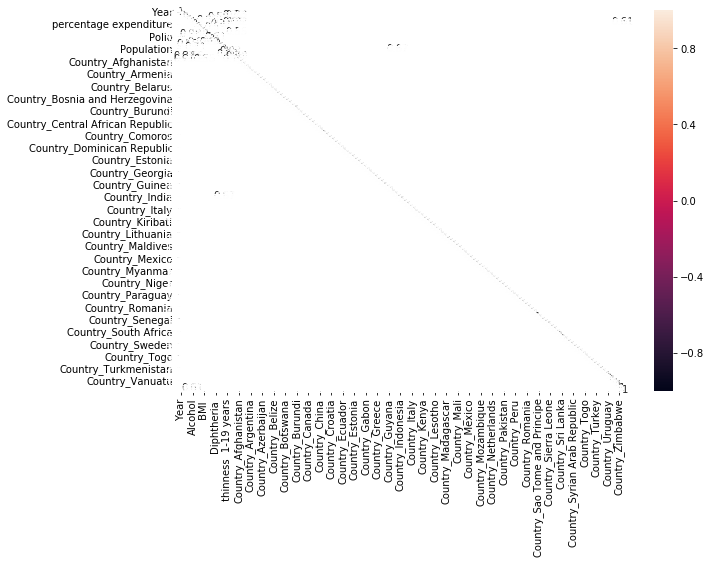

In [40]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(),annot=True,linewidths=2)

In [41]:
df1.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
Year,1.000000,0.050771,-0.037092,-0.001142,-0.113365,0.110494,0.114897,-0.048340,0.005739,0.001251,...,0.003479,0.003479,-0.019707,-0.019707,0.003479,-0.019707,0.031720,-0.019707,-0.034138,0.034138
Life expectancy,0.050771,1.000000,-0.702523,-0.443694,0.402718,0.312599,0.199935,-0.163407,0.542042,-0.479005,...,-0.047665,-0.129614,0.005931,0.073116,-0.012733,0.022273,-0.107050,-0.216980,0.442798,-0.442798
Adult Mortality,-0.037092,-0.702523,1.000000,0.316530,-0.175535,-0.156047,-0.105225,0.125084,-0.351542,0.348627,...,0.032306,0.067447,0.029256,-0.036723,0.011615,-0.016838,0.125818,0.231425,-0.278173,0.278173
infant deaths,-0.001142,-0.443694,0.316530,1.000000,-0.328625,-0.206979,-0.146108,0.303586,-0.342299,0.982329,...,0.074877,0.074877,0.080480,-0.099774,0.074877,-0.144838,0.065612,0.080480,-0.350197,0.350197
Alcohol,-0.113365,0.402718,-0.175535,-0.328625,1.000000,0.242047,0.109889,-0.039255,0.353396,-0.330412,...,-0.041472,0.069437,0.067462,0.038998,-0.064573,-0.088642,-0.046933,-0.001218,0.607782,-0.607782
percentage expenditure,0.110494,0.312599,-0.156047,-0.206979,0.242047,1.000000,0.110430,-0.098559,0.246558,-0.211914,...,-0.015324,-0.003569,-0.023760,0.018240,-0.054556,0.025231,-0.010388,-0.122935,0.183455,-0.183455
Hepatitis B,0.114897,0.199935,-0.105225,-0.146108,0.109889,0.110430,1.000000,-0.093302,0.143302,-0.140176,...,0.062463,-0.058889,-0.083912,0.056330,0.056301,-0.088404,-0.010124,-0.036499,0.140351,-0.140351
Measles,-0.048340,-0.163407,0.125084,0.303586,-0.039255,-0.098559,-0.093302,1.000000,-0.155825,0.303885,...,-0.039032,0.056966,0.058952,-0.096332,0.010265,-0.058267,0.081803,0.014844,0.030122,-0.030122
BMI,0.005739,0.542042,-0.351542,-0.342299,0.353396,0.246558,0.143302,-0.155825,1.000000,-0.362092,...,-0.003463,-0.101414,0.058566,0.068205,-0.018601,0.026804,-0.083966,-0.065184,0.298380,-0.298380
under-five deaths,0.001251,-0.479005,0.348627,0.982329,-0.330412,-0.211914,-0.140176,0.303885,-0.362092,1.000000,...,0.077609,0.077609,0.083416,-0.098097,0.077609,-0.143476,0.068005,0.083416,-0.357250,0.357250
